In [51]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

In [40]:
with open('log') as f:
    res = json.load(f)

In [58]:
new_res = []
ids = []
for k, v in res.items():
    for v_i in v:
        ids.append(int(k))
        new_res.append(v_i)


In [59]:
df = pd.DataFrame(new_res, columns=['query', 'backbone', 'subject', 'bs_value', 'dS1', 'dS2'])
df['start'] = ids

In [60]:
df.head()

,query,backbone,subject,bs_value,dS1,dS2,start
0,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.061361,0.061361,0
1,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.061073,0.061073,3
2,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.060408,0.060408,6
3,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.059760,0.059760,9
4,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.059760,0.059760,12


In [85]:
keep_ = df[(df.dS1 > df.dS2) & (df.bs_value > 0.8)].start

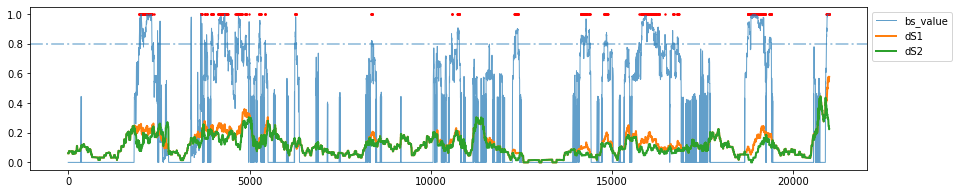

In [91]:
plt.figure(figsize=(15, 3))
plt.plot(df.start, df.bs_value, label='bs_value', linewidth=1, alpha=0.7)
plt.plot(df.start, df.dS1, label='dS1', linewidth=2)
plt.plot(df.start, df.dS2, label='dS2', linewidth=2)
plt.axhline(0.8, linewidth=2, alpha=0.4, linestyle='-.')
plt.scatter(x=keep_, y=[1]*len(keep_), s=2, c='r')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))